# Final Milestone

### Bring in needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Take CSV and convert to dataframe

In [2]:
df =pd.read_csv(r"C:\Users\david\Documents\comp574-active\final-project-comp574\final_data.csv")


In [3]:
df.columns

Index(['dt', 'weather', 'visibility', 'pop', 'Time of Day', 'main.temp',
       'main.feels_like', 'main.temp_min', 'main.temp_max', 'main.pressure',
       'main.sea_level', 'main.grnd_level', 'main.humidity', 'clouds.all',
       'wind.speed', 'wind.deg', 'wind.gust', 'sys.pod', 'rain.3h', 'zip',
       'city', 'conditions'],
      dtype='object')

#### Replace "pop" with "Chance of Precipitation" as "pop" does not explain what the column contains for data

In [4]:
df.rename(columns={"pop":"Chance of Precipitation"}, inplace=True)


#### a and b are used to collect the names of the two cities from the dataframe

In [5]:
a = df["city"][0]
b = df["city"][40]

#### Set the figure size so that 

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(30,8))

<Figure size 2160x576 with 0 Axes>

<Figure size 2160x576 with 0 Axes>

## Check the general conditions in each location over the next 48 hours

(array([21.,  0.,  0.,  3.,  0.,  0.,  9.,  0.,  0.,  1.,  0.,  0.,  4.,
         0.,  1.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
        3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
        5.        ]),
 <BarContainer object of 15 artists>)

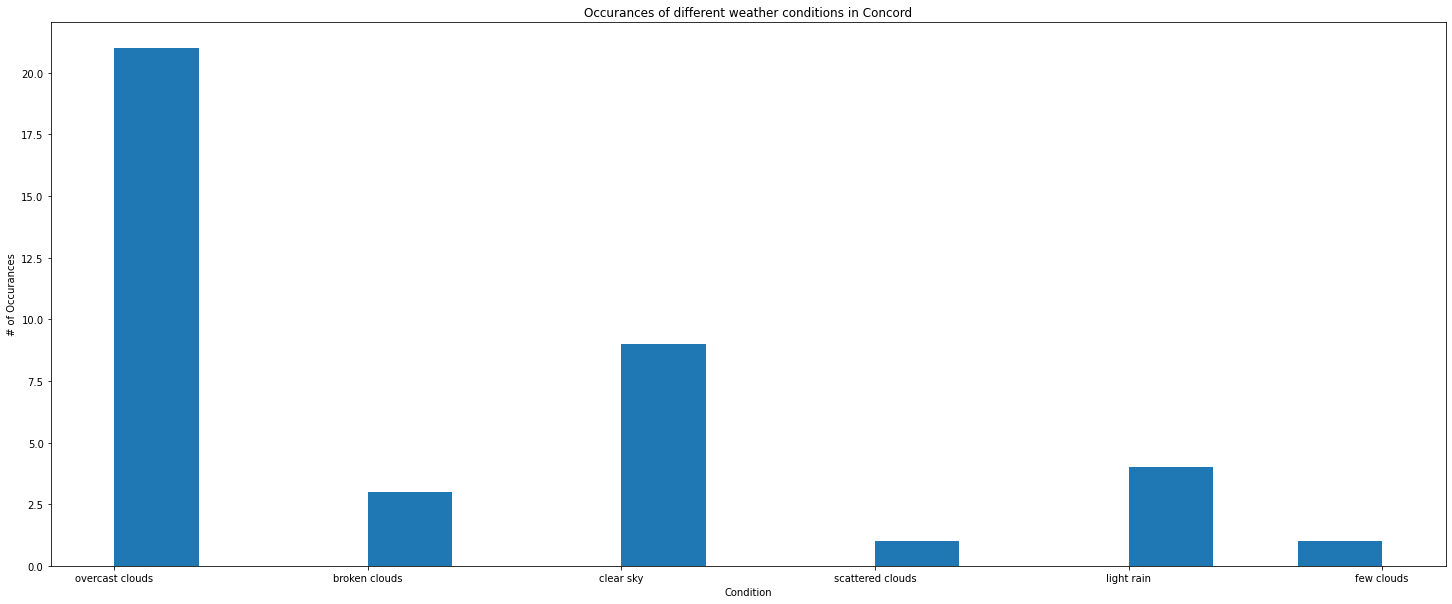

In [7]:
figure(figsize=(25,10))
plt.title("Occurances of different weather conditions in {}".format(a))
plt.xlabel("Condition")
plt.ylabel("# of Occurances")
plt.hist(df["conditions"][:39], bins=15)

(array([ 2.,  0.,  0.,  6.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 22.,  0.,
         0.,  4.]),
 array([0.        , 0.26666667, 0.53333333, 0.8       , 1.06666667,
        1.33333333, 1.6       , 1.86666667, 2.13333333, 2.4       ,
        2.66666667, 2.93333333, 3.2       , 3.46666667, 3.73333333,
        4.        ]),
 <BarContainer object of 15 artists>)

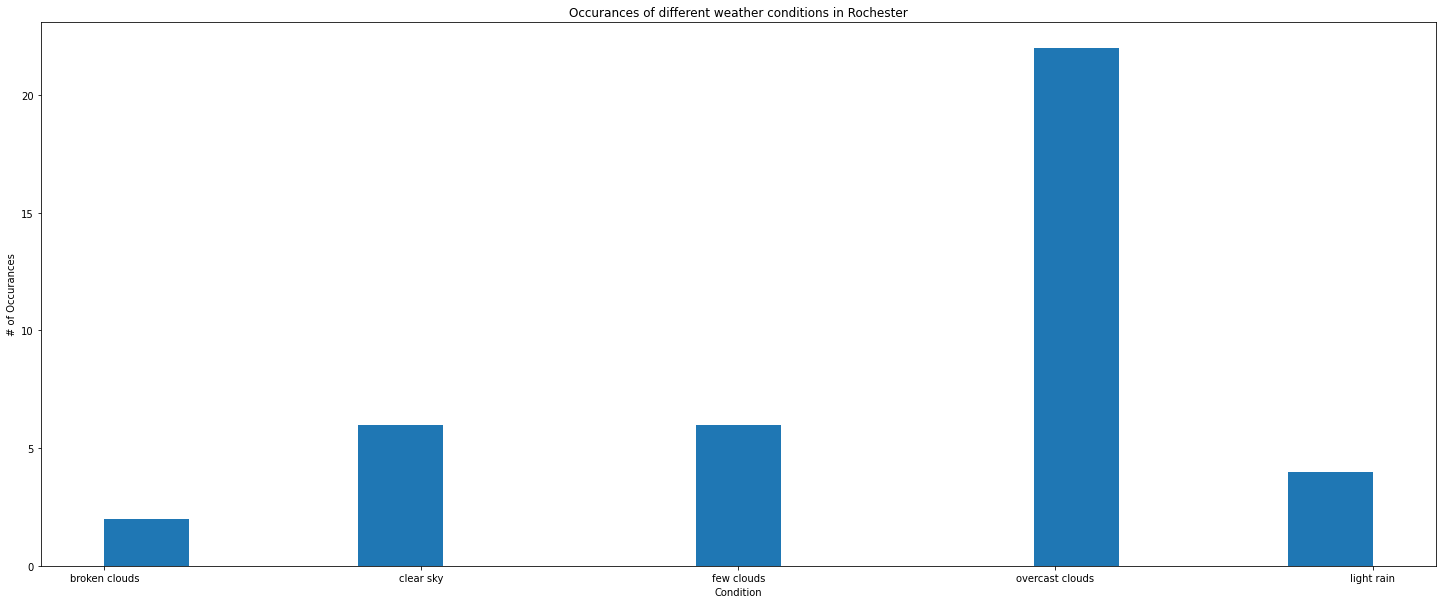

In [8]:
figure(figsize=(25,10))
plt.title("Occurances of different weather conditions in {}".format(b))
plt.xlabel("Condition")
plt.ylabel("# of Occurances")
plt.hist(df["conditions"][40:], bins=15)

#### One hot encode the conditions column to create a column for each condition

In [9]:
df = pd.get_dummies(df, columns=['conditions'], prefix = ['condition'])

#### Convert Chance of Precipitation from a decimal to a percentage

In [10]:
df["Chance of Precipitation"] = df["Chance of Precipitation"] * 100

## Visuals below shows the chance of precipitation over the next 48 hours for both cities

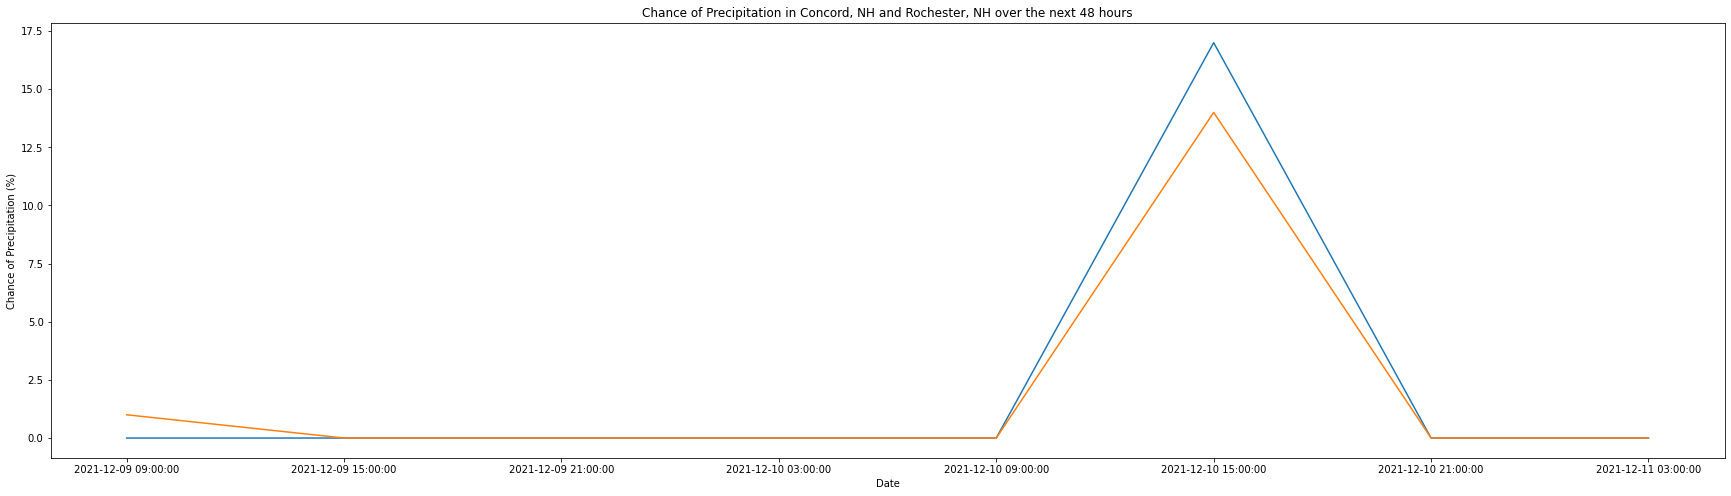

In [11]:
figure(figsize=(30,8))
plt.title("Chance of Precipitation in {}, NH and {}, NH over the next 48 hours".format(a, b))
plt.ylabel("Chance of Precipitation (%)")
plt.xlabel("Date")
plt.plot(df["Time of Day"][0:16:2], df["Chance of Precipitation"][0:16:2], label= "c")
plt.plot(df["Time of Day"][40:56:2], df["Chance of Precipitation"][40:56:2], label= "f")

#### Convert all temperature columns from Kelvin to Fahrenheit 

In [12]:
df["main.temp"] = df["main.temp"].apply(lambda x : (x-273.15)*(9/5) +32)
df["main.feels_like"] = df["main.feels_like"].apply(lambda x : (x-273.15)*(9/5) +32)
df["main.temp_min"] = df["main.temp_min"].apply(lambda x : (x-273.15)*(9/5) +32)
df["main.temp_max"] = df["main.temp_max"].apply(lambda x : (x-273.15)*(9/5) +32)
df

,dt,weather,visibility,Chance of Precipitation,Time of Day,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,...,sys.pod,rain.3h,zip,city,condition_broken clouds,condition_clear sky,condition_few clouds,condition_light rain,condition_overcast clouds,condition_scattered clouds
0,1639040400,"[{'id': 804, 'main': 'Clouds', 'description': ...",10000,0.0,2021-12-09 09:00:00,24.656,24.656,24.656,25.430,1014,...,n,NaN,3301,Concord,0,0,0,0,1,0
1,1639051200,"[{'id': 803, 'main': 'Clouds', 'description': ...",10000,0.0,2021-12-09 12:00:00,24.782,20.354,24.782,25.034,1016,...,n,NaN,3301,Concord,1,0,0,0,0,0
2,1639062000,"[{'id': 800, 'main': 'Clear', 'description': '...",10000,0.0,2021-12-09 15:00:00,33.440,25.484,33.440,33.440,1019,...,d,NaN,3301,Concord,0,1,0,0,0,0
3,1639072800,"[{'id': 802, 'main': 'Clouds', 'description': ...",10000,0.0,2021-12-09 18:00:00,35.708,28.670,35.708,35.708,1020,...,d,NaN,3301,Concord,0,0,0,0,0,1
4,1639083600,"[{'id': 804, 'main': 'Clouds', 'description': ...",10000,0.0,2021-12-09 21:00:00,31.514,25.394,31.514,31.514,1022,...,d,NaN,3301,Concord,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1639418400,"[{'id': 804, 'main': 'Clouds', 'description': ...",10000,0.0,2021-12-13 18:00:00,49.118,43.412,49.118,49.118,1014,...,d,NaN,3867,Rochester,0,0,0,0,1,0
76,1639429200,"[{'id': 800, 'main': 'Clear', 'description': '...",10000,0.0,2021-12-13 21:00:00,45.932,39.290,45.932,45.932,1015,...,d,NaN,3867,Rochester,0,1,0,0,0,0
77,1639440000,"[{'id': 800, 'main': 'Clear', 'description': '...",10000,0.0,2021-12-14 00:00:00,42.800,35.582,42.800,42.800,1018,...,n,NaN,3867,Rochester,0,1,0,0,0,0
78,1639450800,"[{'id': 801, 'main': 'Clouds', 'description': ...",10000,0.0,2021-12-14 03:00:00,40.874,33.404,40.874,40.874,1020,...,n,NaN,3867,Rochester,0,0,1,0,0,0


#### Get rid of any unused columns

In [13]:
df.drop(["dt", "weather", "Time of Day", "sys.pod", "city"], axis = 1, inplace=True)

#### Check for NaN values

In [14]:
df.isnull().sum()

visibility                     0
Chance of Precipitation        0
main.temp                      0
main.feels_like                0
main.temp_min                  0
main.temp_max                  0
main.pressure                  0
main.sea_level                 0
main.grnd_level                0
main.humidity                  0
clouds.all                     0
wind.speed                     0
wind.deg                       0
wind.gust                      0
rain.3h                       72
zip                            0
condition_broken clouds        0
condition_clear sky            0
condition_few clouds           0
condition_light rain           0
condition_overcast clouds      0
condition_scattered clouds     0
dtype: int64

In [15]:
df.loc[df["Chance of Precipitation"] == 0]

,visibility,Chance of Precipitation,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,...,wind.deg,wind.gust,rain.3h,zip,condition_broken clouds,condition_clear sky,condition_few clouds,condition_light rain,condition_overcast clouds,condition_scattered clouds
0,10000,0.0,24.656,24.656,24.656,25.430,1014,1014,1006,90,...,253,0.88,NaN,3301,0,0,0,0,1,0
1,10000,0.0,24.782,20.354,24.782,25.034,1016,1016,1009,92,...,269,4.31,NaN,3301,1,0,0,0,0,0
2,10000,0.0,33.440,25.484,33.440,33.440,1019,1019,1011,51,...,305,7.40,NaN,3301,0,1,0,0,0,0
3,10000,0.0,35.708,28.670,35.708,35.708,1020,1020,1011,38,...,304,6.51,NaN,3301,0,0,0,0,0,1
4,10000,0.0,31.514,25.394,31.514,31.514,1022,1022,1014,46,...,320,6.01,NaN,3301,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,10000,0.0,49.118,43.412,49.118,49.118,1014,1014,1006,41,...,238,18.08,NaN,3867,0,0,0,0,1,0
76,10000,0.0,45.932,39.290,45.932,45.932,1015,1015,1006,46,...,268,18.29,NaN,3867,0,1,0,0,0,0
77,10000,0.0,42.800,35.582,42.800,42.800,1018,1018,1009,57,...,284,16.76,NaN,3867,0,1,0,0,0,0
78,10000,0.0,40.874,33.404,40.874,40.874,1020,1020,1012,65,...,292,14.49,NaN,3867,0,0,1,0,0,0


#### Fill NaN value with 0 since nearly all NaN values are asociated with 0% chance of precipitation

In [16]:
df["rain.3h"] = df["rain.3h"].fillna(0)


#### Check for any other NaN values

In [17]:
df.isnull().sum()

visibility                    0
Chance of Precipitation       0
main.temp                     0
main.feels_like               0
main.temp_min                 0
main.temp_max                 0
main.pressure                 0
main.sea_level                0
main.grnd_level               0
main.humidity                 0
clouds.all                    0
wind.speed                    0
wind.deg                      0
wind.gust                     0
rain.3h                       0
zip                           0
condition_broken clouds       0
condition_clear sky           0
condition_few clouds          0
condition_light rain          0
condition_overcast clouds     0
condition_scattered clouds    0
dtype: int64

In [18]:
df

,visibility,Chance of Precipitation,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,...,wind.deg,wind.gust,rain.3h,zip,condition_broken clouds,condition_clear sky,condition_few clouds,condition_light rain,condition_overcast clouds,condition_scattered clouds
0,10000,0.0,24.656,24.656,24.656,25.430,1014,1014,1006,90,...,253,0.88,0.0,3301,0,0,0,0,1,0
1,10000,0.0,24.782,20.354,24.782,25.034,1016,1016,1009,92,...,269,4.31,0.0,3301,1,0,0,0,0,0
2,10000,0.0,33.440,25.484,33.440,33.440,1019,1019,1011,51,...,305,7.40,0.0,3301,0,1,0,0,0,0
3,10000,0.0,35.708,28.670,35.708,35.708,1020,1020,1011,38,...,304,6.51,0.0,3301,0,0,0,0,0,1
4,10000,0.0,31.514,25.394,31.514,31.514,1022,1022,1014,46,...,320,6.01,0.0,3301,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,10000,0.0,49.118,43.412,49.118,49.118,1014,1014,1006,41,...,238,18.08,0.0,3867,0,0,0,0,1,0
76,10000,0.0,45.932,39.290,45.932,45.932,1015,1015,1006,46,...,268,18.29,0.0,3867,0,1,0,0,0,0
77,10000,0.0,42.800,35.582,42.800,42.800,1018,1018,1009,57,...,284,16.76,0.0,3867,0,1,0,0,0,0
78,10000,0.0,40.874,33.404,40.874,40.874,1020,1020,1012,65,...,292,14.49,0.0,3867,0,0,1,0,0,0


#### Remove the feature that the model should attempt to predict from the data

In [19]:
y = df.pop("condition_few clouds")
y = y[:60]

#### Split data so there is data to use for training and testing the model and then some data to use the model on.

In [20]:
X_train_std = df[0:60]
X_submit = df[32:]

#### Split data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_std, y, test_size=0.8, random_state=1, stratify=y)

#### Fit the K nearest neighbors model with the training sets

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Test model on the test set

In [23]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9583333333333334

#### Test model on the rest of the data

In [24]:
y_pred = knn.predict(X_submit)
accuracy_score(y_test, y_pred)

0.9583333333333334